# Impact of Maliciousness on Lifetime

In [1]:
# Import
import numpy as np
import pandas as pd 
from datetime import datetime
from datetime import timedelta
from IPython.display import HTML, display
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Disable warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# Color palette
sns.set_palette("rocket")

## General Malware Indicator Dataset

In [2]:
# Remove all rows without a last_seen_utc
urlData = pd.read_csv('.\Data\Threat_Fox\\threat_fox_urls.csv',sep=',', skipinitialspace=True)
urlData = urlData.loc[urlData["last_seen_utc"].notna()]

ipData = pd.read_csv('.\Data\Threat_Fox\\threat_fox_ip.csv',sep=',', skipinitialspace=True)
ipData = ipData.loc[ipData["last_seen_utc"].notna()]

hashData = pd.read_csv('.\Data\Threat_Fox\\threat_fox_md5.csv',sep=',', skipinitialspace=True)
hashData = hashData.loc[hashData["last_seen_utc"].notna()]

In [3]:
# Remove all rows where the indicator is younger than one year
present = datetime.now()
past = timedelta(days=31)
year = present - past

urlData["last_seen_utc"] = urlData["last_seen_utc"].apply(lambda x: pd.to_datetime(x))
urlData["first_seen_utc"] = urlData["first_seen_utc"].apply(lambda x: pd.to_datetime(x))
urlData = urlData[urlData["last_seen_utc"] < year]
urlData = urlData[urlData["last_seen_utc"] != urlData["first_seen_utc"]]

ipData["last_seen_utc"] = ipData["last_seen_utc"].apply(lambda x: pd.to_datetime(x))
ipData["first_seen_utc"] = ipData["first_seen_utc"].apply(lambda x: pd.to_datetime(x))
ipData = ipData[ipData["last_seen_utc"] < year]
ipData = ipData[ipData["last_seen_utc"] != ipData["first_seen_utc"]]

hashData["last_seen_utc"] = hashData["last_seen_utc"].apply(lambda x: pd.to_datetime(x))
hashData["first_seen_utc"] = hashData["first_seen_utc"].apply(lambda x: pd.to_datetime(x))
hashData = hashData[hashData["last_seen_utc"] < year]
hashData = hashData[hashData["last_seen_utc"] != hashData["first_seen_utc"]]

In [4]:
# Calculate lifetime and delete negative values
urlData['lifetimeHours'] = (urlData["last_seen_utc"] - urlData["first_seen_utc"]) / pd.Timedelta(hours=1)
urlData = urlData[urlData['lifetimeHours'] >= 0].dropna()

ipData['lifetimeHours'] = (ipData["last_seen_utc"] - ipData["first_seen_utc"]) / pd.Timedelta(hours=1)
ipData = ipData[ipData['lifetimeHours'] >= 0].dropna()

hashData['lifetimeHours'] = (hashData["last_seen_utc"] - hashData["first_seen_utc"]) / pd.Timedelta(hours=1)
hashData = hashData[hashData['lifetimeHours'] >= 0].dropna()

In [5]:
fullData = pd.concat([urlData, hashData, ipData], axis=0)
fullData.shape[0]

127448

### Correlation of Confidence and Lifetime

<Axes: xlabel='confidence_level', ylabel='count'>

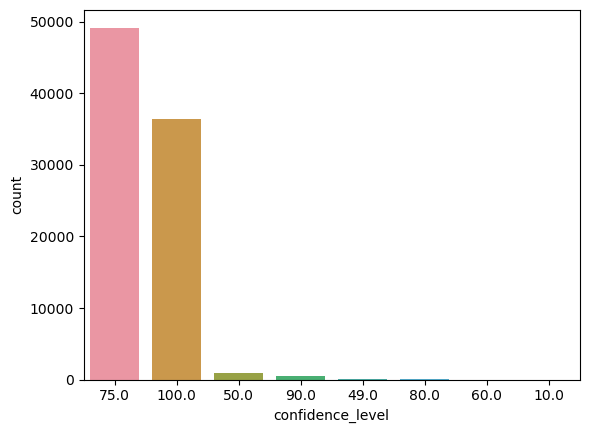

In [6]:
sns.countplot(x='confidence_level', data=urlData, order=urlData.confidence_level.value_counts().iloc[:10].index)
#plt.savefig("conf_dis.svg",bbox_inches='tight')

<Axes: ylabel='confidence_level'>

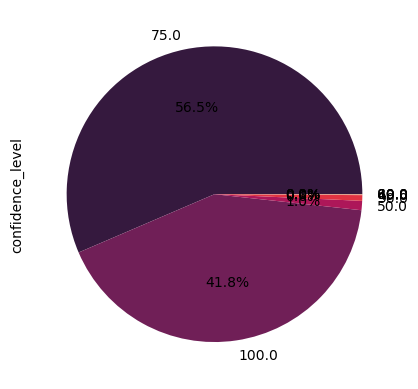

In [7]:
urlData["confidence_level"].value_counts().plot.pie(autopct='%.1f%%')

## URL

In [8]:
print(urlData["confidence_level"].corr(urlData["lifetimeHours"]))

0.03841934228268235


<Axes: xlabel='confidence_level'>

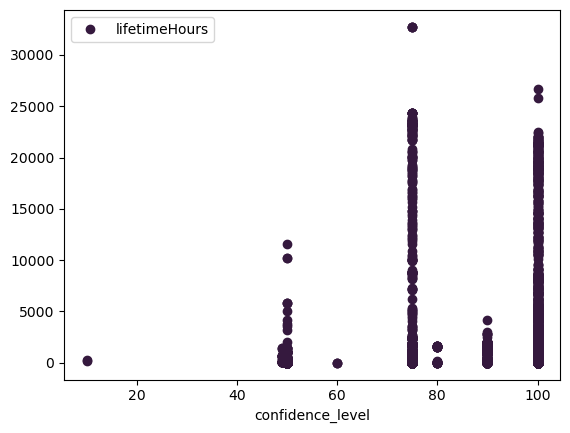

In [9]:
urlData.plot("confidence_level","lifetimeHours", marker="o", ls="")

## Hash

In [10]:
print(hashData["confidence_level"].corr(hashData["lifetimeHours"]))

-0.22315462168531341


<Axes: xlabel='confidence_level'>

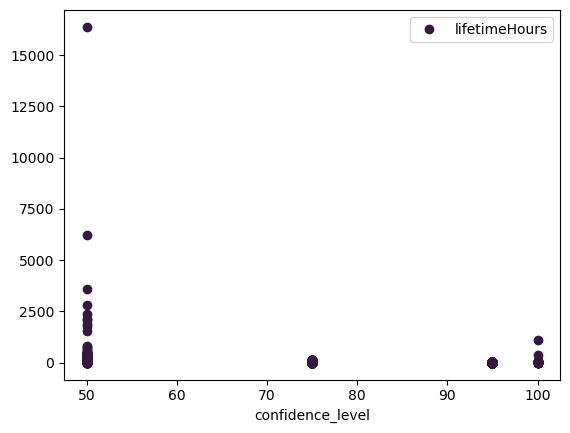

In [11]:
hashData.plot("confidence_level","lifetimeHours", marker="o", ls="")

## IP

In [12]:
print(ipData["confidence_level"].corr(ipData["lifetimeHours"]))

0.08520290364986202


<Axes: xlabel='confidence_level'>

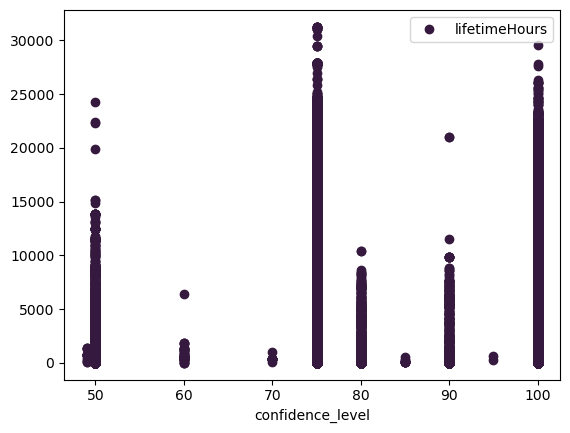

In [13]:
ipData.plot("confidence_level","lifetimeHours", marker="o", ls="")

### Full Dataset


In [14]:
print(fullData["confidence_level"].corr(fullData["lifetimeHours"]))

0.06031418792298756


<Axes: xlabel='confidence_level'>

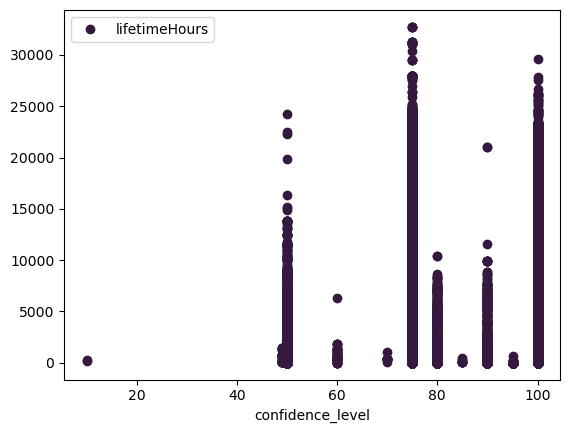

In [15]:
fullData.plot("confidence_level","lifetimeHours", marker="o", ls="")
#plt.savefig("ioC_all_corr.svg",bbox_inches='tight')

In [16]:
# Split1 = 50/50
split1_50_train, split1_50_test = train_test_split(fullData, test_size=0.5)

# Split1 = 70/30
split2_30_train, split2_70_test = train_test_split(fullData, test_size=0.7)

# Split1 = 30/70
split3_70_train, split3_30_test = train_test_split(fullData, test_size=0.3)

In [17]:
# Display information
average = [["split1_50_train Lifetime",split1_50_train["confidence_level"].corr(split1_50_train["lifetimeHours"])], 
           ["split1_50_test Lifetime",split1_50_test["confidence_level"].corr(split1_50_test["lifetimeHours"])], 
           ["split2_30_train Lifetime",split2_30_train["confidence_level"].corr(split2_30_train["lifetimeHours"])],
           ["split2_70_test Lifetime",split2_70_test["confidence_level"].corr(split2_70_test["lifetimeHours"])], 
           ["split3_70_train Lifetime",split3_70_train["confidence_level"].corr(split3_70_train["lifetimeHours"])],
            ["split3_30_test Lifetime",split3_30_test["confidence_level"].corr(split3_30_test["lifetimeHours"])]]

display(HTML(
   "<table><tr>{}</tr></table>".format(
       "</tr><tr>".join(
           "<td>{}</td>".format("</td><td>".join(str(_) for _ in row)) for row in average))
))

split1_50_train Lifetime,0.05884985465145508
split1_50_test Lifetime,0.061761597295606416
split2_30_train Lifetime,0.06455799560504677
split2_70_test Lifetime,0.058501153984773034
split3_70_train Lifetime,0.060248586746855806
split3_30_test Lifetime,0.06047854936704134


## URL APT Phishing Indicator Dataset

In [18]:
customData = pd.read_csv(".\Data\\Phishing\VT_Submissions_Metadata.csv", sep=",", encoding='windows-1252')
# Separat sightings
customData["sightings"] = customData["sightings"].str.split("#")

# Remove all rows where the indicator is younger than 1 month
present = datetime.now()
past = timedelta(days=31)
year = present - past

customData["Last Submission"] = customData["Last Submission"].apply(lambda x: pd.to_datetime(x))
customData["First Submission"] = customData["First Submission"].apply(lambda x: pd.to_datetime(x))
customData["lifetimeInHours"] = (customData["Last Submission"] - customData["First Submission"]) / pd.Timedelta(hours=1)
customData = customData[customData["Last Submission"] < year]
customData = customData[customData["Last Submission"] != customData["First Submission"]]
customData = customData[customData['lifetimeInHours'] >= 0].dropna()
customData = customData[customData['Malicious'] != 0]

In [19]:
customData.head()

,Unnamed: 0,Indicator,ID,Type,Threat Name,TLD,Last Submission,First Submission,Malicious,Harmless,sightings,lifetimeInHours
0,0,calendar-ua.firstcloudit.com,3744f508ffae357561e31e0a57d33336d82f71da7674cb...,url,['Mal/HTMLGen-A'],com,2024-10-06 01:45:00,2024-02-27 06:52:40,6,62,"[2024-10-06 01:45:00, 2024-10-05 23:25:43, 202...",5322.872222
1,0,calendarua.firstcloudit.com,0a8ce89569d558d9fefcb4ab46c3a276fb59716a93cf44...,url,['Mal/HTMLGen-A'],com,2024-10-05 23:26:13,2024-02-27 06:52:44,5,63,"[2024-10-05 23:26:13, 2024-08-30 04:38:24, 202...",5320.558056
2,0,dls-gov.firstcloudit.com,70ea1dc461e51cd37480afb52fd758218bfcedd95f4063...,url,[],com,2024-09-29 16:57:38,2024-02-27 06:52:37,7,62,"[2024-09-29 16:57:38, 2024-08-30 04:38:25, 202...",5170.083611
3,0,e-gov-am.firstcloudit.com,e24501b97c978979be2c26ac0533cffec5eb7151595335...,url,[],com,2024-09-29 16:57:57,2023-11-27 18:12:56,6,61,"[2024-09-29 16:57:57, 2024-08-30 04:38:25, 202...",7366.750278
4,0,e-gov.firstcloudit.com,af5fda8a5f3a352efb4d1dd69c3edc3e740bd59375099b...,url,[],com,2024-09-29 16:57:39,2024-02-27 06:52:43,6,61,"[2024-09-29 16:57:39, 2024-08-30 04:38:25, 202...",5170.082222


In [23]:
print(customData["Malicious"].corr(customData["lifetimeInHours"]))

0.3580233639963937


In [20]:
# Split1 = 50/50
split1_50_train_vt, split1_50_test_vt = train_test_split(customData, test_size=0.5)

# Split1 = 70/30
split2_30_train_vt, split2_70_test_vt = train_test_split(customData, test_size=0.7)

# Split1 = 30/70
split3_70_train_vt, split3_30_test_vt = train_test_split(customData, test_size=0.3)

In [22]:
# Display information
average = [["split1_50_train Lifetime",split1_50_train_vt["Malicious"].corr(split1_50_train_vt["lifetimeInHours"])], 
           ["split1_50_test Lifetime",split1_50_test_vt["Malicious"].corr(split1_50_test_vt["lifetimeInHours"])], 
           ["split2_30_train Lifetime",split2_30_train_vt["Malicious"].corr(split2_30_train_vt["lifetimeInHours"])],
           ["split2_70_test Lifetime",split2_70_test_vt["Malicious"].corr(split2_70_test_vt["lifetimeInHours"])], 
           ["split3_70_train Lifetime",split3_70_train_vt["Malicious"].corr(split3_70_train_vt["lifetimeInHours"])],
            ["split3_30_test Lifetime",split3_30_test_vt["Malicious"].corr(split3_30_test_vt["lifetimeInHours"])]]

display(HTML(
   "<table><tr>{}</tr></table>".format(
       "</tr><tr>".join(
           "<td>{}</td>".format("</td><td>".join(str(_) for _ in row)) for row in average))
))

split1_50_train Lifetime,0.3406230088852205
split1_50_test Lifetime,0.37709715577228037
split2_30_train Lifetime,0.363345715239215
split2_70_test Lifetime,0.3550648377712223
split3_70_train Lifetime,0.3036565491155075
split3_30_test Lifetime,0.477916468515333
